<img src="./images/Front_Kalaripayattu.svg"/>

[Photo](https://en.wikipedia.org/wiki/Kalaripayattu#/media/File:Kalarippayattu.jpg) by Leelavathy B.M / [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) / Not actually Kung Fu

# How do we loop over the elements on a list?

In [1]:
numbers = [1, 2, 3, 4, 5]
for n in numbers:
    print(n)

1
2
3
4
5


# We all agree that's much better than:

In [2]:
for index in range(0, len(numbers)):
    print(numbers[index])

1
2
3
4
5


Every time somebody loops over the indexes, a kitten dies.

# ... or, even worse:

In [3]:
index = 0
while index < len(numbers):
    print(numbers[index])
    index += 1

1
2
3


This is going to get at least *two* kittens dead.

# Python's for loop
- Known as 'for-each' in other programming languages.
- **Higher abstraction** level $\rightarrow$ more **readable** and clear.
- We don't care about indexes or implementation details.
- We just say *"loop over this"* (whatever it is)

Recommended talk: [Loop Like a Native](https://www.youtube.com/watch?v=EnSu9hHGq5o), by Ned Batchelder.

## It's safer
- Not manipulating indexes $\rightarrow$ fewer places were we can make mistakes.
- Actually, we can arguably err nowhere using a for-each loop.

In [4]:
index = 0
while index <= len(numbers):  # Ooops!
    print(numbers[index])
    index += 1

1
2
3


IndexError: list index out of range

# The for loop not only works with lists

## Strings 

In [5]:
for letter in "aeiou":
    print(letter)

a
e
i
o
u


## Sets

In [6]:
numbers = {"one", "two", "three"}
for n in numbers:
    print(n)

two
three
one


Note: no guarantees as for the order. See [All Your Ducks In A Row](https://www.youtube.com/watch?v=fYlnfvKVDoM), by Brandon Rhodes

## Dictionaries

In [7]:
numbers = {1 : "one", 2 : "two", 3 : "three"}
for key, value in numbers.items():
    print(key, "->", value)

1 -> one
2 -> two
3 -> three


## Files

In [8]:
with open("quixote.txt") as fd:
    for line in fd:
        print(line, end="") # line already includes a newline

In a village of La Mancha, the name of which I have no desire to call
to mind, there lived not long since one of those gentlemen that keep a
lance in the lance-rack, an old buckler, a lean hack, and a greyhound
for coursing.


# We can use the for loop with anything that's *iterable*

Advanced tip: we can use [Abstract Base Classes](https://docs.python.org/3/library/abc.html).

[collections.abc.Iterable](https://docs.python.org/3/library/collections.abc.html#collections.abc.Iterable) is an ABC for classes that are iterable.

In [9]:
import collections.abc

print(issubclass(list, collections.abc.Iterable))
print(issubclass(str,  collections.abc.Iterable))

True
True


In [10]:
isinstance({1, 2}, collections.Iterable)
isinstance("abcd", collections.Iterable)

True

# Detour: What's an iterable?

From the [Glossary](https://docs.python.org/3/glossary.html#term-iterable):
> An object capable of returning its members one at a time. Examples of iterables include all sequence types (such as `list`, `str`, and `tuple`) and some non-sequence types like dict, file objects, and objects of any classes you define with an `__iter__()` or `__getitem__()` method. 

So our object will be iterable if it implements `__iter__()` [`*`]

[`*`] ... or `__getitem__()`, but let's focus on  `__iter__()`.

## What's `__iter__()`?

Again, [from the docs](https://docs.python.org/3/reference/datamodel.html#object.__iter__):

> This method is called when an iterator is required for a container. This method should return a new iterator
object that can iterate over all the objects in the container. For mappings, it should iterate over the keys of the container.

- So we need to implement `__iter__()` and make it return an *iterator*
- This method is called implicitly by the built-in `iter()`


### I don't believe you

In [12]:
numbers = [1, 2, 3]

print(numbers.__iter__)

<method-wrapper '__iter__' of list object at 0x7fdbbc074788>


OK, `__iter__()` exists.

In [13]:
it = iter(numbers) # calls __iter__()
print(it)

... and it returns an iterator.

## But... what's an *iterator*?

It's an object that conforms to the [**Iterator Protocol**](https://docs.python.org/3/library/stdtypes.html#iterator-types), implementing two methods.

### `iterator.__iter__()`

> Return the iterator object itself. This is required to allow both containers and iterators to be used with the for and in statements. This method corresponds to the `tp_iter` slot of the type structure for Python objects in the Python/C API.

- TL;DR: implement `__iter__()`, make it return `self`.
- We need to do this, for... whatever reasons.

I'll follow the instructions, then.

In [14]:
class MyIterator(object):    
    
    def __iter__(self):
        return self

This feels pointless.

### `iterator.__next__()` 

> Return the next item from the container. If there are no further items, raise the `StopIteration` exception. This method corresponds to the `tp_iternext` slot of the type structure for Python objects in the Python/C API.

- No, I did not understand the second sentence either.
- This was `.next()` in the now long-forgotten, barely remembered Python 2.

In [15]:
class MyIterator(object):
    
    def __init__(self, elements):
        self.elements = elements
        self.index = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):
        # No elements left, so raise exception.
        if self.index >= len(self.elements):
            raise StopIteration
        
        result = self.elements[self.index]
        self.index += 1
        return result

    
it = MyIterator([1, 2, 3])
print(next(it)) # calls __next__()
print(next(it))
print(next(it))

1
2
3


- We've built our own ugly, awkward iterator object. Yay!
- Recommended reading: [Understanding Python Iterables and Iterators](http://www.shutupandship.com/2012/01/understanding-python-iterables-and.html)

The fourth time we call `next()`, `StopIteration` happens:

In [16]:
print(next(it))

StopIteration: 

## `next()` must be used on iterators

Even if our class is iterable, we need an iterator to loop over it:

In [17]:
numbers = [1, 2, 3]
next(numbers)

TypeError: 'list' object is not an iterator

In [18]:
numbers = [1, 2, 3]
it = iter(numbers) # calls __iter__(), returns iterator
print("Iterator:", it)  # it is an iterator indeed

Iterator: <list_iterator object at 0x7fdb9e3f0da0>


In [19]:
print(next(it)) # returns 1
print(next(it)) # returns 2
print(next(it)) # returns 3
print(next(it)) # raises StopIteration

1
2
3


StopIteration: 

### This is exactly what the `for` loop does under the hood


- Uses `iter()` to get an iterator.
- Repeatedly calls `next()`.
- Stops when `StopIteration` is raised.

In [20]:
numbers = [1, 2, 3]

def awkward_for(iterable):
    it = iter(iterable)
    while True:
        try:
            print(next(it))
        except StopIteration:
            break
            
awkward_for(numbers)

1
2
3


I'm so happy we have the built-in `for` instead of this monster.

## `for` and `StopIteration`

- Although the iterator *will* raise StopIteration, we don't have to worry about it.
- It turns out that the for loop listens for StopIteration explicitly.
- It doesn't catch other exceptions raised by the iterator...
- ... or `StopIteration` raised within the body of the loop.

In [21]:
numbers = [1, 2, 3]

for n in numbers:
    raise StopIteration # break stuff

StopIteration: 

# Detour: Generators

Generators are a special type of iterator.

How a normal function works:

- The execution starts at the function's first line.
- It continues until we reach a `return` statement...
- ... or the end of the function — that returns `None` implicitly.
- Whatever result we return, must be returned at once.

Recommended readings:
- ['yield' and Generators Explained](https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/)
- [Generator Tricks for Systems Programmers](http://www.dabeaz.com/generators/)

## Single exit point

In [22]:
def foo(x):
    """Add one, then square."""
    
    y = x + 1  # we first do this
    z = y ** 2 # then we do this
    return z   # exit the function here


print(foo(4))

25


## Multiple exit points

In [23]:
import random

def spam(x):
    """Square if even, halve if odd."""
    
    if x % 2 == 0:
        return x ** 2  # we may exit here...
    return x / 2       # ... or here.


print(spam(4)) # 4 ** 2 = 16
print(spam(7)) # 7 / 2  = 3.5

16
3.5


## Implicit `None`

In [24]:
def foobar(x):
    y = x + 1  # do nothing with 'y'
    # implicit `return None`
    
    
print(foobar(2))

None


Let's say that we want to work with even numbers.

In [25]:
def get_even(stop):
    """Return all the even numbers <= stop."""
    
    numbers = []
    n = 0
    while n <= stop:
        numbers.append(n)
        n += 2
    return numbers

... or, of course, simply:

In [26]:
def get_even(stop):
    return list(range(0, stop + 1, 2))


print(get_even(10)) # [2 ... 10]
print("Sum:", sum(get_even(10))) 

[0, 2, 4, 6, 8, 10]
Sum: 30


## When problems arise

- The problem is that we're building the list...
- ... and returning all the elements **at once**.
- Working with large intervals becomes impractical, to say the least.

In [27]:
sum(get_even(int(1e18)))  # not enough RAM modules

MemoryError: 

## Generators to the rescue
- Generators are functions that are able to return values **one by one**.
- The state of the function is frozen until the next value is requested.
- They use they `yield` keyword instead of `return`.
- If there's $\gt 1$ `yield` in our function, it becomes a `generator function`.
- Generator functions return generator iterators (generators, for short)

In [28]:
def simple_generator():
    yield 1  # will return this the first time
    yield 2  # this the second time
    yield 3  # and this the third time

    
g = simple_generator()
print(g)
print(next(g)) # returns 1
print(next(g)) # returns 2
print(next(g)) # returns 3
print(next(g)) # raises StopIteration

<generator object simple_generator at 0x7fdbe0916a20>
1
2
3


StopIteration: 

Let's say that we want a function that returns **all** natural numbers:

In [29]:
def count():
    n = 1
    while True:
        yield n
        n += 1
        
        
numbers = count()
print(numbers) # again, it's a generator
print(next(numbers)) # 1
print(next(numbers)) # 2
print(next(numbers)) # 3

<generator object count at 0x7fdbe0930828>
1
2
3


... and so on, up to infinity and beyond.

This is not possible with a normal function — we can't return *all* the natural numbers.

In [30]:
def count():
    """Try to return all natural numbers, and fail."""
    
    result = []
    n = 1
    while True:
        result.append(n)
        n += 1

Don't run this code.

## Extra points: generator expressions

- Like comprehension lists, but with **lazy** evaluation.
- They generate the elements one by one, as needed.

In [31]:
g = (x ** 2 for x in range(1, 1000000))

In [32]:
print(g) # it's a generator indeed
print(next(g)) # computes the square of 1
print(next(g)) # computes the square of 2
print(next(g)) # computes the square of 3

<generator object <genexpr> at 0x7fdb9e428ab0>
1
4
9


## Even more extra points:

- `range()` is **not** a generator
- In the old world of Python 2 it returned a list.
- But now, in Python3, generates elements one by one.

In [33]:
numbers = range(1, 100)

In [34]:
print(numbers) # range(1, 100) 
print(type(numbers)) # it's a 'range' object

range(1, 100)
<class 'range'>


In [35]:
it = iter(numbers)
print(next(it)) # returns the first element
print(next(it)) # returns the second element

1
2


## So...

- `range` is a `sequence object` that produces numbers on demand.
- `sequences` in Python are object that support random access.
- It can also contain if the number is part of the range in $\mathcal{O}(1)$...
- ... instead of the $\mathcal{O}(n)$ that it would take to scan through all of them.

In [36]:
odd = range(1, int(1e50), 2)

In [37]:
print(odd)  # a really large range indeed

range(1, 100000000000000007629769841091887003294964970946560, 2)


In [38]:
print(int(1e48) in odd) # completes before the heat death of the Universe

False


## Summary

- Iterators are objects on which we can call `next()`
- Generators generate elements one by one.
- Every generator is an iterator, but not vice versa.
- We could achieve the same with a custom iterator — but this is nicer.

Recommended reading: [this answer by Alex Martelli on Stack Owerflow](http://stackoverflow.com/a/2776865).

## Extra: Measuring a generator

How do we calculate the number of elements of a generator?

In [39]:
g = (x ** 2 for x in range(1, 101))

This doesn't work.

In [40]:
len(g) # TypeError

TypeError: object of type 'generator' has no len()

### Idea: cast to list

In [41]:
g = (x ** 2 for x in range(1, 101))
len(list(g))

100

But we need a temporary list.

### Better: use `sum()`

In [43]:
g = (x ** 2 for x in range(1, 101))
sum(1 for x in g)  # use another generator

100

Or more idiomatic, as we don't care about the vale of the numbers:

In [45]:
g = (x ** 2 for x in range(1, 101))
sum(1 for _ in g)

100

Use `_` as a throwaway variable.

# Finally, time for some Kung Fu

<img src="./images/Deflected_Kick.jpg" style="height: 400px; width:auto"/>

[Photo](https://www.flickr.com/photos/kurt-b/9453209945/) by Kurt Bauschardt / [CC BY-SA 2.0](https://creativecommons.org/licenses/by-sa/2.0/)

# Prime numbers

How do we determine whether a number is prime?

In [47]:
def is_prime(n):
    """Checks whether a number is prime."""

    divisor = 2
    while divisor < n:
        if n % divisor == 0:
            return False
        divisor += 1
    return True


print(is_prime(2)) # True
print(is_prime(3)) # True
print(is_prime(8)) # False

True
True
False


But we already now there's a much better way with `range()`!

In [48]:
def is_prime(n):
    """Checks whether a number is prime."""

    for divisor in range(2, n):
        if n % divisor == 0:
            return False
        divisor += 1
    return True


print(is_prime(5)) # True
print(is_prime(6)) # False
print(is_prime(7)) # True

True
False
True


## Mandatory optimization: check divisors only until $\sqrt{n}$
- Because a non-prime number $n$ will have a divisor $\le \sqrt{n}$
- Brings us down from $\mathcal{O}(n)$ to $\mathcal{O}(\sqrt{n})$. Not bad.
- Recommended reading, with proof for humans: [this answer on Stack Overflow](http://stackoverflow.com/a/5811176)

In [49]:
import math

def is_prime(n):
    """Checks whether a number is prime."""

    stop = int(math.sqrt(n)) + 1
    for divisor in range(2, stop):
        if n % divisor == 0:
            return False
        divisor += 1
    return True


print(is_prime(10))
print(is_prime(13))

False
True


# Integer factorization
- Now we want to decompose a number into its prime factors.
- For example, $8 = 2 \times 2 \times 2 = 2^3$, and $30 = 2 \times 3 \times 5$
- Simplest method: [trial division](https://en.wikipedia.org/wiki/Trial_division), one by one
- For this we'll need to loop over prime numbers

# Getting the first n prime numbers
## Attempt 1

In [50]:
def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""
    
    primes = []
    n = 2
    while len(primes) < how_many:
        if is_prime(n):
            primes.append(n)
        n += 1
    return primes


print(get_primes(5))

[2, 3, 5, 7, 11]


**Problem:** we need to generate all the prime numbers at once.

Let's use a generator instead!

## Attempt 2

In [51]:
def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""
    
    counter = 0
    n = 2
    while counter < how_many:
        if is_prime(n):
            yield n
            counter += 1
        n += 1

<generator object get_primes at 0x7fdbe0941120>
[2, 3, 5, 7, 11]


Twice as many places where we can commit a mistake, as we're keeping track of:
- How many prime numbers we have generated so far.
- What's the next number we need to evaluate.

`range()` is not an option because we don't know what the stop is. But we can use...

## itertools.count()

- Makes an iterator that returns evenly spaced values starting with $n$.
- By default, we start counting from zero.
- The default step is one.

In [52]:
import itertools
numbers = itertools.count()
print(numbers) # tells us what the next element will be
print(next(numbers)) # 0
print(next(numbers)) # 1
print(next(numbers)) # 2

count(0)
0
1
2


In [53]:
odd = itertools.count(1, step=2)
print(next(odd)) # first odd number
print(next(odd)) # second odd number

1
3


## Attempt 3
We can thus simplify our code a little bit:

In [54]:
def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""
    
    counter = 0
    for n in itertools.count(2):
        if is_prime(n):
            yield n
            counter += 1
            if counter == how_many:
                break

However, this is still awkward, as our function does two things:

- Generates prime numbers
- Keeps track if how many we have generated so far. 

Let's split it in two different steps.

## Attempt 4

In [55]:
def primes():
    """An endless generator of prime numbers."""
    
    for n in itertools.count(2):
        if is_prime(n):
            yield n

def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""
    
    counter = 0
    all_primes = primes()
    while counter < how_many:
        yield next(all_primes)
        counter += 1

Good! But this can be simplified even further!

To get all the prime numbers we can use a generator expression

In [56]:
primes = (n for n in itertools.count(2) if is_prime(n))

... or `filter()`:

In [57]:
primes = filter(is_prime, itertools.count(2))

Notes:
- generator expressions are usually shorter and more readable
- But in this case `filter()` is arguably better — we're taking the value as it is.
- `filter()` was `itertools.ifilter()` before...
- ... but nobody uses Python 2 anymore.

## Attempt 5

In [58]:
def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""
    
    counter = 0
    primes = filter(is_prime, itertools.count(2))
    while counter < how_many:
        yield next(all_primes)
        counter += 1

## Take how many?

- This thing that we're doing in `get_primes()` is a common pattern.
- *"Give me the first n elements of this iterable"*
- We cannot use slice notation:

In [59]:
numbers = [1, 2, 3, 4, 5]
print(numbers[:3]) # the first three
print(get_primes(10)[:5]) # slicing doesn't work with generators

[1, 2, 3]


TypeError: 'generator' object is not subscriptable

## itertools.islice()

- Like slice notation, but works with all things iterable.
- Lazy evaluation, of course, asking for elements once at a time.

In [60]:
for n in itertools.islice(itertools.count(), 5):
    print(n)

0
1
2
3
4


In [61]:
word = "abcde"
print(list(itertools.islice(word, 3))) # the first three letters

['a', 'b', 'c']


In [62]:
# If start != 0, skip elements until it's reached
squares = (x ** 2 for x in itertools.count(1))
print(list(itertools.islice(squares, 10, 15))) # start=10, stop=15

[121, 144, 169, 196, 225]


In [63]:
# We can use a step other than one.
numbers = range(100000)
print(list(itertools.islice(numbers, 0, 20, 2))) # step=2

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


So if we want the first $n$ prime numbers:

In [64]:
primes = filter(is_prime, itertools.count(2))
for n in itertools.islice(primes, 10):
    print(n)

2
3
5
7
11
13
17
19
23
29


## Attempt 6

Let's rewrite our function:

In [65]:
def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""

    primes = filter(is_prime, itertools.count(2))
    for n in itertools.islice(primes, how_many):
        yield n
        
        
for n in get_primes(5):
    print(n)

2
3
5
7
11


We're just looping over the elements of a iterator and in turn `yield`ing them. 

This is what `yield from` was invented for!

## yield from

- Allows a generator to delegate part of its operations to another generator.
- That is, each `next()` which ask the sub-generator for another value.
- Usually we delegate to subgenerators, but it works with anything *iterable*.
- `yield from iterable` $\approx$ `for item in iterable: yield item`
- It is also a transparent two-way channel from the caller to the sub-generator.

In [66]:
def foo():
    yield 1
    yield 2
    yield 3
    
def spam():
    yield from foo() # for x in foo(): yield x


print(list(spam()))

[1, 2, 3]


In [67]:
def vowels():
    # Works with anything iterable
    yield from "aeiou"

    
print(list(vowels()))

['a', 'e', 'i', 'o', 'u']


Recommended reading:
[A Curious Course on Coroutines and Concurrency](http://dabeaz.com/coroutines/)

## Attempt 7
So we can rewrite our function as:

In [68]:
def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""

    primes = filter(is_prime, itertools.count(2))
    yield from itertools.islice(primes, how_many)


for n in get_primes(5):
    print(n)

2
3
5
7
11


Yet we can make this even shorter.

- We're just defining a generator that delegates all the work to another generator.
- The first argument to `islice()` is always the same: `primes`.
- The only thing that changes is the second one, `how_many`. 

This is what `functools.partial()` was invented for!

## functools.partial()

- Used for partial function application. That's formal language for...
- ... *"freezing some portion of a function's arguments"*.
- It also supports freezing keyword arguments.
- Allows us to simplifying a function signature.
- You don't know you need it in your life until you come across it.

In [69]:
import functools

power_two = functools.partial(math.pow, 2) # freeze 'math.pow(2, ...'
print(power_two)

functools.partial(<built-in function pow>, 2)


In [70]:
print(power_two(3)) # math.pow(2, 3)
print(power_two(5)) # math.pow(2, 5)
print(power_two(9)) # math.pow(2, 9)

8.0
32.0
512.0


Used in real life to create handy shortcuts for a function we'll **call repeatedly**, and where some arguments are always the same:

In [71]:
import os.path

src_dir = "/home/vterron/src/"
print(os.path.join(src_dir, "file1.py"))
print(os.path.join(src_dir, "file2.py"))
print(os.path.join(src_dir, "file3.py"))
# This is getting a little tedious...

/home/vterron/src/file1.py
/home/vterron/src/file2.py
/home/vterron/src/file3.py


We can do instead:

In [72]:
get_src = functools.partial(os.path.join, "/home/vterron/src/")
print(get_src("file1.py")) # os.path.join("/home/vterron/src/", "file1.py")
print(get_src("file2.py"))
print(get_src("file3.py"))

/home/vterron/src/file1.py
/home/vterron/src/file2.py
/home/vterron/src/file3.py


... or as a shorcut to define a function:

In [73]:
import random

def bonoloto():
    """Get a random ticket to play BonoLoto."""
    return random.sample(range(1, 50), 6)


bonoloto()

[44, 20, 18, 48, 38, 3]

In [75]:
import functools
import random

bonoloto = functools.partial(random.sample, range(1, 50), 6)
bonoloto()

[13, 7, 33, 45, 40, 41]

## Attempt 8
So going back to our function...

In [77]:
def get_primes(how_many):
    """Return the first 'how_many' prime numbers."""

    primes = filter(is_prime, itertools.count(2))
    yield from itertools.islice(primes, how_many)

We can do instead:

In [78]:
primes = filter(is_prime, itertools.count(2))
get_primes = functools.partial(itertools.islice, primes)
        
for n in get_primes(5):
    print(n)

2
3
5
7
11


<img src="./images/Shi_DeRu_and_Shi_DeYang.jpg" style="height: 400px; width:auto"/>

[Photo](https://commons.wikimedia.org/wiki/File:Shi_DeRu_and_Shi_DeYang.jpg) by Shi Deru / [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en) / Cropped from original

# Integer factorization, Part II

- This is all neat and good, but not exactly what we need here.
- We don't want the first whatever prime numbers...
- ... but all the prime numbers $\le \sqrt{n}$.
- For example, to factorize 15 we need to test all the primes until $\left \lceil{\sqrt{15}}\right \rceil = 3$:

## Generating all the divisors $\le x$
### Naive attempt

In [79]:
def primes_until(stop):
    """Return all the prime numbers <= stop."""

    primes = filter(is_prime, itertools.count(2))
    for p in primes:
        if p <= stop:
            yield p
        else:
            break

            
print(list(primes_until(15)))

[2, 3, 5, 7, 11, 13]


This is also a common pattern: loop over the elements of an iterable, stopping as soon as some condition is no longer satisfied. And this is what `takewhile()` was invented for!

## `itertools.takewhile()`
- Make an iterator that returns elements.
- Stop when the predicate is no longer `True`.
- Frequently used in conjunction with lambda functions.

In [80]:
numbers = range(1, 10000)

# Take numbers as long as they're < 4
it = itertools.takewhile(lambda x: x < 4, numbers)
print(next(it)) # 1 is < 4, so we return it
print(next(it)) # 2 is < 4, so we return it
print(next(it)) # 3 is < 4, so we return it
print(next(it)) # 4 is *not* < 4, so stop

1
2
3


StopIteration: 

### Lambda functions are not mandatory

In [81]:
def smaller_than_ten(x):
    """Checks whether the number is < 10."""
    return x < 10

numbers = range(0, int(1e12), 2)
list(itertools.takewhile(smaller_than_ten, numbers))

[0, 2, 4, 6, 8]

### But since we're at it...

In [83]:
def is_smaller(x, than=float("inf")):
    return x < than

numbers = range(0, int(1e18), 2)
# functools.partial() + keyword argument = more readable!
for n in itertools.takewhile(functools.partial(is_smaller, than=10), numbers):
    print(n)

0
2
4
6
8


## `operator`
This [must-know module](https://docs.python.org/3/library/operator.html) exports all standard operators as functions.

In [84]:
import operator

print(operator.lt(3, 5))   # 3 < 5 -> True
print(operator.not_(True)) # not True -> False
print(operator.add(2, 1))   # 2 + 1 -> 3
print(operator.neg(-1))    # -(-1) -> 1

# In-place addition
x = [1, 2, 3]
operator.iadd(x, [4, 5]) # x += [4, 5]
print(x) # [1, 2, 3, 4, 5]

True
False
3
1
[1, 2, 3, 4, 5]


So we can rewrite our solution as...

In [85]:
numbers = range(0, int(1e24), 2)

smaller_than_ten = functools.partial(operator.gt, 10)
for n in itertools.takewhile(smaller_than_ten, numbers):
    print(n)

0
2
4
6
8


- Note that with `partial()` we have to bind arguments left to right.
- Instead of testing whether $x < 10$...
- ... we're rewriting it as $10 > x$

Anyway.

## Generating all the divisors $\le x$
### Kung Fu version

In [86]:
def primes_until(stop):
    """Return all the prime numbers <= stop."""    
    primes = filter(is_prime, itertools.count(2))
    yield from itertools.takewhile(lambda p: p < stop, primes)
    
            
for x in primes_until(15):
    print(x)

2
3
5
7
11
13


Woo-hoo! And what about the *opposite*?

## `itertools.dropwhile()`
- Make an iterator that returns elements.
- Ignore elements as long as the predicate is `True`.
- As soon as it's not anymore, return everything.

In [87]:
numbers = range(1, 10000)

# Ignore numbers as long as they're < 4
it = itertools.dropwhile(lambda x: x < 4, numbers)
print(next(it)) # 'it' returns 1 -> 1 < 4, so we drop it, so ...
                # 'it' returns 2 -> 2 < 4, so we drop it, so ...
                # 'it' returns 3 -> 3 < 4, so we drop it, so ...
                # returns 4
                
print(next(it)) # returns 5
print(next(it)) # returns 6
print(next(it)) # returns 7
print(next(it)) # returns 8

# ... and so on until we exhaust 'numbers'

4
5
6
7
8


## Prime numbers within a range
Using both `takewhile()` and `dropwhile()` gets us this:

In [88]:
def primes_range(start=2, stop=float("inf")):
    """Return all the prime numbers start <= x < stop."""
    
    primes = filter(is_prime, itertools.count(2))
    it = itertools.dropwhile(lambda x: x < start, primes)
    yield from itertools.takewhile(lambda y: y < stop, it)

In [89]:
print(list(primes_range(100, 125))) # 100 <= x < 125

[101, 103, 107, 109, 113]


In [90]:
print(list(primes_range(stop=20)))  # all primes < 20

[2, 3, 5, 7, 11, 13, 17, 19]


In [91]:
it = primes_range(start=1000)       # all primes >= 1000
print(next(it)) # 1009
print(next(it)) # 1013
print(next(it)) # 1019
print(next(it)) # 1021

# ... and so on until infinity.

1009
1013
1019
1021


## Integer factorization: The Algorithm


- Iterate over the prime numbers $p \le \sqrt{n}$
- If $n$ is divisible by $p$, then $p$ is a factor.
- Divide $n$ by $p$ and factorize the quotient, recursively.
- Base case: we ran out of prime numbers, so $n$ is prime too.
- The factorization is all found factors.

## Example: factorize $30$

- Is $30$ divisible by $2$? Yes.
- Therefore, $2$ is a factor.

Factorize now the quotient, $30 \div 2 = 15$:

- Is $15$ divisible by $2$? No.
- Is $15$ divisible by $3$? Yes.
- Therefore, $3$ is a factor.

Factorize now the quotient, $15 \div 3 = 5$:
- There're no primes $\le \sqrt{5}$, so $5$ is prime too.
- $30 = 2 \times 3 \times 5$

## Show me the code

In [92]:
import math

def factorize(n):
    """Decompose n into prime numbers."""

    for p in primes_until(int(math.sqrt(n))):
        quotient, remainder = divmod(n, p)
        if remainder == 0:
            # 'p' is a prime factor 
            return [p] + factorize(quotient)
    # Base case, reached only if we run out of primes
    return [n] # n is prime


print(factorize(30)) # [2, 3, 5]
print(factorize(70)) # [2, 3, 7]
print(factorize(78)) # [2, 3, 13]
print(factorize(11)) # we hit the base case directly

[2, 3, 5]
[2, 5, 7]
[2, 3, 13]
[11]


<img src="./images/Battle_Cry.jpg" style="height: 400px; width:auto"/>

[Photo](https://www.flickr.com/photos/kurt-b/9455997776) by Kurt Bauschardt / [CC BY-SA 2.0](https://creativecommons.org/licenses/by-sa/2.0/) / Cropped from original

# The `uniq` command

A Unix command that collapses adjacent identical lines into one.

In [93]:
%%bash

cat ~/letters.txt

a
a
a
b
b
a


In [94]:
%%bash

uniq ~/letters.txt

a
b
a


Note that we're only removing **consecutive** duplicates.

## Our own version 
### Padawan attempt

For simplicity's sake, let's accept only strings as input.

In [95]:
def uniq(word):
    """Remove consecutive duplicates letters."""
    
    # Don't break if string is empty
    if not word:
        return ''
    
    result = [word[0]]
    for letter in word[1:]:
        if letter != result[-1]:
            result.append(letter)
    return ''.join(result)


print(uniq("a"))             # 'a'
print(uniq("bbb"))           # 'b'    
print(uniq("abc"))           # 'abc'
print(uniq("aabbbccccdee"))  # 'abcde'

a
b
abc
abcde


## itertools.groupby()

- Make an iterator that returns consecutive `keys` and `groups` from the iterable.
- A new `group` starts every time the value of the key changes.
- The `group` objects are a sub-iterator over the elements in the group.

In [96]:
word = "aabccc"
groups = itertools.groupby(word)
print(groups) # a 'groupby' object — an iterable

In [97]:
key1, group1 = next(groups) # give me the first group
print("Key:", key1) # 'a'

Key: a


In [98]:
print("Group:", group1) # a '_grouper' object... another iterable

Group: <itertools._grouper object at 0x7fdb9e424358>


In [99]:
print("Next:", next(group1)) # the first 'a'
print("Next:", next(group1)) # the second 'a'
print("Next:", next(group1)) # StopIteration

Next: a
Next: a


StopIteration: 

- Each call to `next()` will return two elements: the `key` and the `group`.
- The `key` is what this group contains — e.g., the letter *a*. 
- The `group` are the actual occurrences of the key — e.g., *"aa"*.

Let's keep going on...

In [100]:
print("Word", word)         # 'aabcc'
key2, group2 = next(groups) # give me the second group
print("Key:", key2)         # ok, so this group contains 'b'

# And how many occurrences of 'b' are there?
print("Group:", group2) # the occurrences of 'b'
print(list(group2))     # ['b'] — oh, only one.

Word aabccc
Key: b
Group: <itertools._grouper object at 0x7fdbd8066208>
['b']


In [101]:
# The third and last group
key3, group3 = next(groups)
print("Key:", key3) # 'c'
print(list(group3)) # ['c', 'c', 'c']

Key: c
['c', 'c', 'c']


## Using a `for` loop instead

In [102]:
word = "aabccc"
for key, group in itertools.groupby(word):
    print(key, "->", list(group))

a -> ['a', 'a']
b -> ['b']
c -> ['c', 'c', 'c']


This might seem silly, but it's very powerful indeed.

## Our `uniq` command
### Kung Fu version

In [103]:
def uniq(word):
    result = []
    # We don't need the group for all, hence the '_'
    for key, _ in itertools.groupby(word):
        result.append(key)
    return ''.join(result)


word = "aaabbcccccdee"
print(uniq(word))

abcde


... or even more succinct:

In [104]:
def uniq(word):
    return ''.join(key for key, _ in itertools.groupby(word))

print(uniq(word))

abcde


# A (rudimentary) compression algorithm

- Let's implement a very basic string compression function...
- ... using the counts of repeated characters.
- For example, "aaabbcccccdee" returns "a3b2c5d1e2"

Without `itertools`, the solution brings us pain and misery.

In [105]:
def compress(word):
    """Return a compressed version of the string."""
    
    result = []
    current = word[0]
    counter = 1
    
    for letter in word[1:]:
        if letter == current:
            # We're still in the same group
            counter += 1
        else:
            # We need to start a new group
            result += [current, str(counter)]
            current = letter # start a new group
            counter = 1
    result += [current, str(counter)]
    return ''.join(result)


word = "aaabbcccccdee"
print(compress(word))  # 'a3b2c5d1e2'

a3b2c5d1e2


### Kung Fu version

In [106]:
def compress(word):
    """Return a compressed version of the string."""
    
    result = []
    for key, group in itertools.groupby(word):
        result.append("{}{}".format(key, len(list(group))))
    return ''.join(result)

word = "aaabbcccccdee"
print(compress(word))  # 'a3b2c5d1e2'

a3b2c5d1e2


## Making it case case-insensitive

A problem is that letters in different case are considered to be different.

In [107]:
print(compress("aaAAAA"))  # 'a2A4'

a2A4


This might make sense, but we're into compressing our strings so much that we decide to ignore the case... *respecting the case of the first occurrence* — otherwise, we would just `.upper()` or `.lower()` the entire string. That is:

- "aaAAAA" $\rightarrow$ "a6"
- "AAaaaa" $\rightarrow$ "A6"
- "BbBccC" $\rightarrow$ "B3c3".

How do we do this?

## The `key` function

- By default, `groupby()` compares the elements as they are seen.
- The keyword argument `key` allows us to specify a different criteria.
- It is a function that transforms each elements before it's compared.
- This is known as the *"key value for each element"*

How is this useful?

### Let's do this:

In [108]:
def compress_more(word):
    """Return an even more compressed version of the string."""
    
    result = []
    # Make the comparison between letters case-insensitive.
    for _, group in itertools.groupby(word, key=lambda x: x.upper()):
        group = list(group)
        # Take first element to respect case of the first occurrence.
        result.append("{}{}".format(group[0], len(group)))
    return ''.join(result)


print(compress_more("aaAAAA"))  # 'a6'
print(compress_more("AAaaaa"))  # 'A6'
print(compress_more("BbBccC"))  # 'B3c3'

a6
A6
B3c3


- We can't use the key, as they will always be in upper case.
- 'group' is an iterator, so we store it as a list to use slices and `len()`.

# Grouping letters by length

Let's say that we have a series of words, and we want to group them by their length.

In [109]:
words = "red orange yellow green blue indigo violet gray".split()

### Rookie version

In [110]:
# Map each length to a list of words
lengths = collections.defaultdict(list)

for w in words:
    lengths[len(w)].append(w)
    
for key, value in lengths.items():
    print(key, '->', value)

3 -> ['red']
4 -> ['blue', 'gray']
5 -> ['green']
6 -> ['orange', 'yellow', 'indigo', 'violet']


### Kung Fu version

In [111]:
words.sort(key=len)
for key, group in itertools.groupby(words, key=len):
    print(key, '->', list(group))

3 -> ['red']
4 -> ['blue', 'gray']
5 -> ['green']
6 -> ['orange', 'yellow', 'indigo', 'violet']


Two things to note:

- We have to sort the list first; otherwise it only groups consecutive items.
- The first solution is $\mathcal{O}(n)$ vs $\mathcal{O}(n \log n)$, because we have to sort the list. But `groupby()` is arguably better here as it's shorter and clearly conveys what we're doing: grouping the words according to a criteria.

# Anagrams

How do we find anagrams in a list of wors?

In [112]:
words = ['listen', 'meteor', 'dawn', 'remote', 'silent']

# If two words are an anagram, sorted() returns the same
print(sorted('listen')) # ['e', 'i', 'l', 'n', 's', 't']
print(sorted('silent')) # ['e', 'i', 'l', 'n', 's', 't']

['e', 'i', 'l', 'n', 's', 't']
['e', 'i', 'l', 'n', 's', 't']


### Neophyte version

In [113]:
anagrams = collections.defaultdict(list)
for w in words:
    # Because lists are not hashable
    anagrams[tuple(sorted(w))].append(w)

for words_ in anagrams.values():
    # 'dawn' doesn't match anything else
    if len(words_) >= 2:
        print(words_)

['listen', 'silent']
['meteor', 'remote']


### Kung Fu version

In [114]:
words.sort(key=sorted)
for _, group in itertools.groupby(words, key=sorted):
    words_ = list(group)
    if len(words_) >= 2:
        print(words_)

['meteor', 'remote']
['listen', 'silent']


In [115]:
%matplotlib inline

# Consecutive values over a threshold

Let's say we have this function:

$\frac{x^3}{14} + \frac{x^2}{14} - \frac{13 x}{14} - \frac{1}{14}$

In [116]:
import numpy

# Build polynomial from coefficients
coeffs = [1/14, 1/14, -13/14, -1/14]
func = numpy.poly1d(coeffs)

func(0.5) # evaluate function at 0.5

-0.5089285714285714

Maths! Run for your lives!

### It looks like this

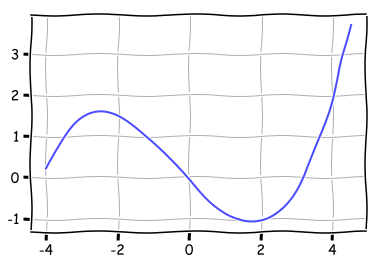

In [118]:
from matplotlib import pyplot
xp = numpy.linspace(-4, 4.5, 100)

pyplot.xkcd()
pyplot.grid(True, linewidth=1)
pyplot.plot(xp, func(xp), 'b', alpha=0.7)
pyplot.savefig("images/curve-one.svg")

### Let's say it's time versus some value we're monitoring

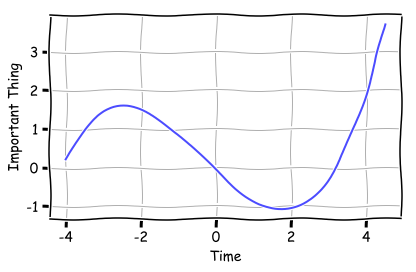

In [25]:
xzero = numpy.linspace(-0.077, 3.183, 100)
yzero = func(xzero)

pyplot.xkcd()
pyplot.grid(True, linewidth=1)
pyplot.plot(xp, func(xp), 'b', alpha=0.7)
pyplot.xlabel("Time")
pyplot.ylabel("Important Thing")
pyplot.tight_layout()
pyplot.savefig("images/curve-two.svg")

<img src="./images/curve-two.svg"/>

We want to **trigger an alarm** if we spent $>= 3$ seconds below zero.

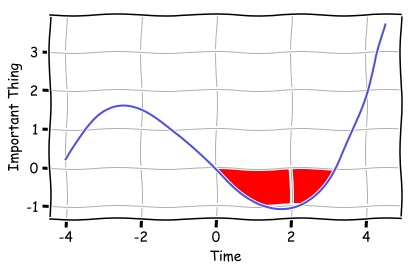

In [27]:
xzero = numpy.linspace(-0.077, 3.183, 100)
yzero = func(xzero)

pyplot.xkcd()
pyplot.grid(True, linewidth=1)
pyplot.plot(xp, func(xp), 'b', alpha=0.7)
pyplot.xlabel("Time")
pyplot.ylabel("Important Thing")
pyplot.fill_between(xzero, 0, func(xzero), facecolor='red')
pyplot.tight_layout()
pyplot.savefig("images/curve-three.svg")

We know that the answer is yes...

<img src="./images/curve-three.svg"/>

How do we do it... in code?

In [120]:
# Use three decimal digits
numpy.set_printoptions(precision=3)

For simplicity, evaluate it only at integers.

In [121]:
xp = range(-4, 5)
yp = func(xp)

for x, y in zip(xp, yp):
    print("f({}) -> {:.3f}".format(x, y))

f(-4) -> 0.214
f(-3) -> 1.429
f(-2) -> 1.500
f(-1) -> 0.857
f(0) -> -0.071
f(1) -> -0.857
f(2) -> -1.071
f(3) -> -0.286
f(4) -> 1.929


Are there three consecutive points here with negative sign?

## It's as simple as this

In [122]:
# Group the func(x) values by whether they're negative or not.
for is_negative, group in itertools.groupby(yp, key=lambda x: x < 0):
    values = numpy.array(list(group))
    print(is_negative, "->", values)
    
    if is_negative and len(values) >= 3:
        print("Trigger alarm!!")
        break

False -> [ 0.214  1.429  1.5    0.857]
True -> [-0.071 -0.857 -1.071 -0.286]
Trigger alarm!!


Don't even try to implement this without `groupby()`.

<img src="./images/Dashi.jpg" style="height: 400px; width:auto"/>

[Photo](https://en.wikipedia.org/wiki/File:Wushu_dao.jpg) by AEMHZ~commonswiki / [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en) / Cropped from original

<img src="./images/Wushu_Dao.jpg" style="height: 400px; width:auto"/>

[Photo](https://en.wikipedia.org/wiki/File:Wushu_dao.jpg) by Alexandre Ferreira / [CC BY-SA 2.0](https://creativecommons.org/licenses/by-sa/2.0/) / Cropped from original

# Iterators are a one-way road

In order to check how many elements there are in a iterator we need to consume it.

In [123]:
g = (x ** 2 for x in range(1, 101))
sum(1 for _ in g)

100

Which... works, but the generator is now exhausted, so we can't use it anymore. 

In [125]:
list(g) # iterator is empty, so empty list

[]

There is no way we can go backwards in the traversal of the iterator.

## There's no going back

Every time we call `next()` the iterator moves one step forward — forever.

In [127]:
it = iter("abcdefghijk")
next(it) # 'a'
next(it) # now b, we'll never see 'a' again

That's why, if we'll need each element more than once, we need to store them in a list.

## `itertools.tee()`

- Returns $n$ independent iterators from a single iterable.
- This allows us to move forward using of these iterators...
- ... while the rest still point at the same place.

In [128]:
even = itertools.count(2, step=2)
a, b = itertools.tee(even)

print(next(a)) # 2
print(next(a)) # 4

2
4


We haven't yet called `next()` with `b`, to it's still at $2$.

In [129]:
print(next(b)) # 2

4


## Measuring an iterator, Part II

We could be tempted to do something like this:

In [130]:
g = (x ** 2 for x in range(1, 101))

# Fork the iterator, rebind name 'g'
g, tmp = itertools.tee(g)
length = sum(1 for _ in tmp)
print("Length:", length)

Length: 100


- We have exahusted the original iterator `g`...
- ... but we use the same name for one of the copies.
- The other copy, `tmp`, is the one we use for counting.

## However...

This is a bad idea. From [the documentation](https://docs.python.org/3/library/itertools.html#itertools.tee):

> This itertool may require significant auxiliary storage (depending on how much temporary data needs to be stored). In general, if one iterator uses most or all of the data before another iterator starts, it is faster to use `list()` instead of `tee()`.

These independent iterators need to store the elements in memory until they've been consumed by all the elements, so if we are going to exahust one of the iterators we're better off by simply using a list.

In [131]:
g = (x ** 2 for x in range(1, 11))
g = list(g)
print(len(g))

10


In [132]:
print(g)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


## When is this iseful, then?

When the independent generators are going to be used more or less **at the same time**.

For example, if we need to compute the difference between consecutive elements in list:

In [133]:
numbers = [1, 5, 7]

# The output will be [4, 2], because 5 - 1 = 4 and 7 - 5 = 2

def diff(sequence):
    # Pair element with the previous one
    pairs = zip(sequence, sequence[1:])
    return [p[1] - p[0] for p in pairs]

diff(numbers)

[4, 2]

However, we can't use this with a generator, because **we can't use slicing**.

In [135]:
numbers = (x ** 2 for x in [1, 5, 7])

diff(numbers)

TypeError: 'generator' object is not subscriptable

## `tee()`  to the rescue

This is a job `tee()` was designed for:

In [136]:
def diff(iterable):
    a, b = itertools.tee(iterable)
    next(b)
    return [p[1] - p[0] for p in zip(a, b)]

numbers = (x for x in [1, 5, 7])
diff(numbers)

[4, 2]

## NumPy already did it

By the way, if we're working with sequences NumPy already includes [a function for this](http://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html):

In [138]:
import numpy
numpy.diff([1, 5, 7])

array([4, 2])

Don't reinvent the wheel!

# A NeverEnding Story

How do we alternate indefinitely between -1 and 1?

### Absolute n00b version

In [140]:
x = 1
while True:
    print(x)
    if x == 1:
        x = -1
    else:
        x = 1

An infinite loop, of catastrophic consequences if executed.

### A little-less-beginner version

In [141]:
x = 1
while True:
    print(x)
    x *= -1

We're all still going to die if we run this.

### The FIFO version

Using a [first in, first out](https://en.wikipedia.org/wiki/FIFO_(computing_and_electronics) queue.

In [142]:
import collections

class Alternate(object):
    """Alternate between 1 and -1 endlessly, via pop()."""
    
    def __init__(self):
        self.values = collections.deque()
        self._refill()

    def _refill(self):
        """Insert some 1's and -1's in the queue."""
        self.values.extend([1, -1] * 10)
               
    def __len__(self):
        return len(self.values)

    def pop(self):
        """Return the next 1 or -1 value."""
        
        # We ran out of values, so generate a few more.
        if not len(self):
            self._refill()
        return self.values.popleft()

The [`collections`](https://docs.python.org/3/library/collections.html#collections.deque) module is awesome, but this is totally overkill.

### The pr0 version

The *"I was paying attention, so I know we have to use a generator"* approach:

In [143]:
def alternate():
    """Alternate between 1 and -1 endlessly."""

    x = 1
    while True:
        yield x
        x *= -1

        
ones = alternate()
print(next(ones)) #  1
print(next(ones)) # -1
print(next(ones)) #  1
# ...

1
-1
1


### Kung Fu version

In [144]:
ones = itertools.cycle([1, -1])

print(next(ones)) #  1
print(next(ones)) # -1
print(next(ones)) #  1
print(next(ones)) # -1
print(next(ones)) #  1
# ...

1
-1
1
-1
1


## `itertools.cycle()`
- Make an iterator returning elements from the iterable...
- ... and save a copy of each of the returned elements.
- When the iterable is exhausted, iterate over the saved copy.
- Repeat indefinitely, until the end of time.

In [145]:
vowels = itertools.cycle("aeiou")

# Endless generator, so we need islice()
for v in itertools.islice(vowels, 10):
    print(v)

a
e
i
o
u
a
e
i
o
u


In [146]:
g = (x ** 2  for x in range(1, 4))

squares = itertools.cycle(g)
print(list(itertools.islice(squares, 11)))

# We've exahusted the generator...

next(g) # StopIteration

[1, 4, 9, 1, 4, 9, 1, 4, 9, 1, 4]


StopIteration: 

In [147]:
# ... but 'cycle' still keeps a copy.

next(squares) # 9

9

## Waiting patiently

A real-life case where `cycle()` proves useful:

In [149]:
import itertools
import sys
import time

def sleep(seconds):
    """Show an animated spinner while we sleep."""
    
    symbols = itertools.cycle('-\|/')
    tend = time.time() + seconds
    while time.time() < tend:
        # '\r' is carriage return: return cursor to the start of the line.
        sys.stdout.write('\rPlease wait... ' + next(symbols)) # no newline
        sys.stdout.flush()
        time.sleep(0.1)
    print() # newline
    
if __name__ == "__main__":     
    sleep(20)

[![asciicast](https://asciinema.org/a/8ocljajktav6nkm3lbtrv7i8l.png)](https://asciinema.org/a/8ocljajktav6nkm3lbtrv7i8l?size=medium&t=3&autoplay=1)

# Iterating over *two* (or more) iterables

Let's count from $1$ to $10$, then down to $1$ again, and so on.

In [150]:
up   = list(range(1, 11))
down = list(reversed(range(2, 10)))

print("Up  :", up)
print("Down:", down)

Up  : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Down: [9, 8, 7, 6, 5, 4, 3, 2]


In [151]:
itertools.cycle(numbers, vowels)

TypeError: cycle expected 1 arguments, got 2

We have a problem — `cycle()` only accepts an iterable.

And, by extension, what do we do if we want to loop over two iterables? This?

In [152]:
numbers = [1, 2, 3]
vowels = "aeiou"

for item in numbers:
    print(item)
for item in vowels:
    print(item)

1
2
3
a
e
i
o
u


There must be a better way — as [Raymond Hettinger always reminds us](https://youtu.be/wf-BqAjZb8M?t=23m7s).

## `itertools.chain()`
- Make an iterator returning elements from the first iterable...
- ... then proceed to the next iterable...
- ... and so on until all of the iterables are exhausted.

In [153]:
numbers = [1, 2, 3]
vowels = "aeiou"

for item in itertools.chain(numbers, vowels):
    print(item)

1
2
3
a
e
i
o
u


So going back to what we wanted to do...

In [154]:
up   = range(1, 11)
down = reversed(range(2, 10))

numbers = itertools.cycle(itertools.chain(up, down))
list(itertools.islice(numbers, 25))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7]

# Doing it lazily

And the other way around? What it we have our iterables already in a list?

In [156]:
words = "Past glories are poor feeding".split() # ― Isaac Asimov
print(words)

['Past', 'glories', 'are', 'poor', 'feeding']


We want to loop other the letters of all the words.

## I'll use `chain()` then

In [157]:
for letter in itertools.chain(words):
    print(letter)

Past
glories
are
poor
feeding


It doesn't work! `chain()` iterates over the strings of the single iterable (the list) it receives. What we want is to chain the *letters* in each word — so each word will need to be an input argument.

## Unpacking Arguments

- Here's where we would normally use **argument unpacking**.
- From list or tuple to separate positional arguments...
- ... using the `*` operator to unpack the arguments out.

In [158]:
def add(x, y):
    return x + y

values = [2, 3]

# Works, but terribly ugly
add(values[0], values[1])

5

In [160]:
# values[0] becomes the first positional argument...
# ... and values[1] becomes the second one.
add(*values)

5

## Unpacking our words

In [162]:
words = "Past glories are poor feeding".split() # ― Isaac Asimov

letters = itertools.chain(*words) # notice the *
list(itertools.islice(letters, 15))

['P', 'a', 's', 't', 'g', 'l', 'o', 'r', 'i', 'e', 's', 'a', 'r', 'e', 'p']

Works! But —

## Intertwining iterators

In [164]:
squares = (x ** 2 for x in range(2, 100000000)) # 1e8
sep     = itertools.cycle(["->"])
powers  = zip(squares, sep)

print(next(powers)) # (4, '->')
print(next(powers)) # (9, '->')
print(next(powers)) # (16, '->')

(4, '->')
(9, '->')
(16, '->')


How do we chain these values? That is: $4 \rightarrow 9 \rightarrow 16 \rightarrow$...

Do we... unpack it, as we just said?

In [165]:
squares = (x ** 2 for x in range(2, 100000000)) # 1e8
sep     = itertools.cycle(["->"])
powers  = zip(squares, sep)

it = itertools.chain(*powers) # unpacks 1e8 arguments

Blood, toil, tears, and sweat ensue.

## `itertools.chain.from_iterable()`
- Alternate constructor for `chain()`
- Chained inputs from a **single iterable argument**...
- ... that is evaluated lazily.

In [166]:
numbers = [1, 2, 3]
vowels = "aeiou"
things = [numbers, vowels]

# Instead of chain() + argument unpacking
for item in itertools.chain.from_iterable(things):
    print(item)

1
2
3
a
e
i
o
u


Since the evaluation is lazy, we could even chain an *infinite* number of iterables.

In [167]:
squares = (x ** 2 for x in range(2, 100000000)) # 1e8
sep     = itertools.cycle(["->"])
powers  = zip(squares, sep)

it = itertools.chain.from_iterable(powers) # doesn't explode
list(itertools.islice(it, 10)) # just the first ten elements

[4, '->', 9, '->', 16, '->', 25, '->', 36, '->']

<img src="./images/Steven_Ho_540_Kick.jpg" style="height: 400px; width:auto"/>

[Photo](https://commons.wikimedia.org/wiki/File:Steven_ho_about.jpg) by Jane Davees / [CC BY 3.0](https://creativecommons.org/licenses/by/3.0/)

# Rolling dices

If we roll two six-sided dices, how many unique combinations are there?

In [169]:
def product(first, second):
    """A generator of the Cartesian product of two iterables."""
    
    for x in first:
        for y in second:
            yield (x, y)
            

dice = range(1, 7)
pairs = list(product(dice, dice))
pairs[:8]

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2)]

In [171]:
# set() needed because (1, 3) is the same result as (3, 1)
len(set(pairs))

36

What if it's *three* dices?

## Three (or more) dices

We need to generalize our solution. For example, via recursion:

In [173]:
def product(*args):
    """A generator of the Cartesian product of multiple iterables."""
    
    # Base case
    if not args:
        yield ()
        return
    
    for element in args[0]:
        for subproduct in product(*args[1:]):
            yield (element,) + subproduct
            
            
dice = range(1, 7)
triplets = product(dice, dice, dice)
for x in itertools.islice(triplets, 7):
    print(x)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(1, 1, 5)
(1, 1, 6)
(1, 2, 1)


## `itertools.product()`

- Make an iterator returning the Cartesian product of the input iterables.
- Cycles with the rightmost element advancing on every iteration.
- To compute the product of an iterable with itself, we use `repeat`.

In [174]:
g = itertools.product([1, 2], "ab")
print(g)

In [175]:
for pair in g:
    print(pair)

(1, 'a')
(1, 'b')
(2, 'a')
(2, 'b')


### `repeat` keyword argument

Instead of writing several times the same input iterable:

In [176]:
dice = range(1, 7)
pairs = itertools.product(dice, repeat=2)

for pair in itertools.islice(pairs, 10):
    print(pair)

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(2, 1)
(2, 2)
(2, 3)
(2, 4)


## An easy question

If we roll four six-sided dices, in how many outcomes they add up to 5?

In [177]:
results = itertools.product(range(1, 7), repeat=4)
results = filter(lambda x: sum(x) == 5, results)

for x in results:
    print(x)

(1, 1, 1, 2)
(1, 1, 2, 1)
(1, 2, 1, 1)
(2, 1, 1, 1)


That is — we need a $2$ in one dice and $1$ in the other three.

## Pixels

Let's say we need to work with pixels — lots of them!

In [178]:
class Pixel(object):

    def __init__(self, row, column):
        self.row = row
        self.column = column

    def __repr__(self):
        """Return a nicely formatted representation string."""
        return "Pixel(row={}, column={})".format(self.row, self.column)
    
    
p = Pixel(2, 3)
print(p)

Pixel(row=2, column=3)


### [`collections.namedtuple()`](https://docs.python.org/3/library/collections.html#collections.namedtuple)

- Factory function for creating tuple subclasses with named fields.
- Makes our live much easier if we don't need our class to be mutable...
- ... because we get `__init__()`, `__repr__()` and others for free.
- We can add our own methods via inheritance.

In [179]:
Pixel = collections.namedtuple("Pixel", "row, column")

That's all.

In [180]:
p = Pixel(5, 1)
print(p)

Pixel(row=5, column=1)


### Adding a method

To compute the distance between two points:

In [181]:
class Pixel(collections.namedtuple("Pixel", "row, column")):
    
    def distance(self, other):
        """Return the Euclidean distance between two picels."""
        
        delta_x = self.row    - other.row
        delta_y = self.column - other.column
        return math.sqrt(delta_x ** 2 + delta_y ** 2)
    
    
p1 = Pixel(2, 3)
p2 = Pixel(5, 1)
print("Distance:", p1.distance(p2), "pixels")

Distance: 3.605551275463989 pixels


## Getting the neighbors

Let's add a method to get the eight neighbors, lateral and diagonal:

### Naive version:

In [182]:
class Pixel(collections.namedtuple("Pixel", "row, column")):

    def neighbours(self):
        """Return a generator of the eight neighbours of the Pixel."""
        
        yield Pixel(self.row - 1, self.column - 1)
        yield Pixel(self.row - 1, self.column    )
        yield Pixel(self.row - 1, self.column + 1)
        yield Pixel(self.row    , self.column - 1)
        yield Pixel(self.row    , self.column + 1)
        yield Pixel(self.row + 1, self.column - 1)
        yield Pixel(self.row + 1, self.column    )
        yield Pixel(self.row + 1, self.column + 1)

That's a lot of code.

### Kung Fu version

In [183]:
class Pixel(collections.namedtuple("Pixel", "row column")):
    
    def neighbours(self):
        """Return a generator of the eight neighbours of the Pixel."""
        
        for x_delta, y_delta in itertools.product([-1, 0, 1], repeat=2):
            if x_delta or y_delta:  # ignore delta (0, 0)
                yield Pixel(self.row + x_delta, self.column + y_delta)
                
                
for p in Pixel(3, 4).neighbours():
    print(p)

Pixel(row=2, column=3)
Pixel(row=2, column=4)
Pixel(row=2, column=5)
Pixel(row=3, column=3)
Pixel(row=3, column=5)
Pixel(row=4, column=3)
Pixel(row=4, column=4)
Pixel(row=4, column=5)


### Kung Fu Master version

Don't hardcode the class name.

In [184]:
class Pixel(collections.namedtuple("Pixel", "row column")):
    
    def neighbours(self):
        """Return a generator of the eight neighbours of the Pixel."""
        
        cls = type(self)  # we can use now 'cls' to create new objects
        for x_delta, y_delta in itertools.product([-1, 0, 1], repeat=2):
            if x_delta or y_delta:  # ignore delta (0, 0)
                yield cls(self.row + x_delta, self.column + y_delta)
                
                
for p in Pixel(4, 7).neighbours():
    print(p)

Pixel(row=3, column=6)
Pixel(row=3, column=7)
Pixel(row=3, column=8)
Pixel(row=4, column=6)
Pixel(row=4, column=8)
Pixel(row=5, column=6)
Pixel(row=5, column=7)
Pixel(row=5, column=8)


<img src="./images/Bulletproof_Bruce_Lee.jpg" style="height: 400px; width:auto"/>

[Photo](http://viviannepierre.deviantart.com/art/Bulletproof-Bruce-Lee-103466411) by Vivianne Pierre / [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)

# Parting Words

We've covered a bunch of stuff ...

- [`itertools.count()`](https://docs.python.org/3/library/itertools.html#itertools.count)
- [`itertools.islice()`](https://docs.python.org/3/library/itertools.html#itertools.islice)
- [`itertools.takewhile()`](https://docs.python.org/3/library/itertools.html#itertools.takewhile)
- [`itertools.dropwhile()`](https://docs.python.org/3/library/itertools.html#itertools.dropwhile)
- [`itertools.groupby()`](https://docs.python.org/3/library/itertools.html#itertools.groupby)
- [`itertools.cycle()`](https://docs.python.org/3/library/itertools.html#itertools.cycle)
- [`itertools.chain()`](https://docs.python.org/3/library/itertools.html#itertools.chain)
- [`itertools.product()`](https://docs.python.org/3/library/itertools.html#itertools.product)
- [`yield from`](https://docs.python.org/3/whatsnew/3.3.html#pep-380)
- [`collections.namedtuple()`](https://docs.python.org/3/library/collections.html#collections.namedtuple)

... but, still, we just scratched the surface.

# The head-fake

The building blocks provided by `itertools` are inspired in languages like [Haskell](https://www.haskell.org/):

- `itertools.count()` $\rightarrow$ [Infinite lists](https://en.wikibooks.org/wiki/Haskell/Lists_II#Infinite_Lists)
- `itertools.islice()` $\rightarrow$ [`take`](http://hackage.haskell.org/package/base-4.9.0.0/docs/Prelude.html#v:take)
- `itertools.takewhile()` $\rightarrow$ [`takeWhile`](http://hackage.haskell.org/package/base-4.9.0.0/docs/Prelude.html#v:takeWhile)
- `itertools.dropwhile()` $\rightarrow$ [`dropWhile`](http://hackage.haskell.org/package/base-4.9.0.0/docs/Prelude.html#v:dropWhile)
- `itertools.groupby()` $\rightarrow$ [`groupBy`](http://hackage.haskell.org/package/base-4.9.0.0/docs/Data-List.html#v:groupBy)
- `itertools.cycle()` $\rightarrow$ [`cycle`](http://hackage.haskell.org/package/base-4.9.0.0/docs/Prelude.html#v:cycle)

— we were also learning [functional programming](https://en.wikipedia.org/wiki/Functional_programming).

<img src="./images/Bruce_Lee_Statue.jpg" style="height: 400px; width:auto"/>

[Photo](https://www.flickr.com/photos/iqremix/9454511368) by IQRemix / [CC BY-SA 2.0](https://creativecommons.org/licenses/by-sa/2.0/) / Cropped from original